## Sentiment Analysis: Comparing 5 News channels

In [228]:
# Dependencies
import json
import pandas as pd
import numpy as np
import tweepy
import matplotlib.pyplot as plt
import seaborn as sns
from config_SA import *
from datetime import datetime
import time

In [229]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [230]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [174]:
# Target Search Term
target_channels = ["@CBSNews", "@CNN", "@BBC",
                "@FoxNews", "@nytimes"]
#target_channels = ["@CBSNews"]

In [179]:
# Make a function to fetch data from twitter
def news_channels_analysis(target_terms):    
    
    news_dict = {"Source Acc.":[],
                 "Date":[],
                 "Tweet":[],
                 "Compound Score":[],
                 "Pos Score":[],
                 "Neu Score":[],
                 "Neg Score":[]}
    # Loop through list of channels
    for target in target_terms:

        # Variables for holding sentiments
        compound_list = []
        positive_list = []
        negative_list = []
        neutral_list = []

        # Loop through 5 pages fetching 20 tweets each time
        for x in range(5):
            news_tweets = api.user_timeline(target, count=20, page=x)
            
            # Loop through tweets to fetch req'd info about each tweet and append into a news_dict
            for tweet in news_tweets:
                #source_account = target_terms
                raw_date = tweet['created_at']
                converted_date = datetime.strptime(raw_date, "%a %b %d %X +0000 %Y").strftime("%m/%d/%y")
                text = tweet['text']
                source_acc = tweet['user']['screen_name']

                # Run Vader Analysis on each tweet
                analysis = analyzer.polarity_scores(tweet["text"])
                compound = analysis["compound"]
                pos = analysis["pos"]
                neu = analysis["neu"]
                neg = analysis["neg"]

                news_dict["Source Acc."].append(source_acc)
                news_dict["Date"].append(converted_date)
                news_dict["Tweet"].append(text)
                news_dict["Compound Score"].append(compound)
                news_dict["Pos Score"].append(pos)
                news_dict["Neu Score"].append(neu)
                news_dict["Neg Score"].append(neg)
            
        print(" ")
        print("----------------------")
        print(str(target) + ' Done!!')
        print("----------------------")
        print(" ")
        time.sleep(5)
    return news_dict

#news_channels_analysis(target_channels)

In [180]:
news_dict_df = pd.DataFrame(news_channels_analysis(target_channels))
news_dict_df

 
----------------------
@CBSNews Done!!
----------------------
 
 
----------------------
@CNN Done!!
----------------------
 
 
----------------------
@BBC Done!!
----------------------
 
 
----------------------
@FoxNews Done!!
----------------------
 
 
----------------------
@nytimes Done!!
----------------------
 


,Compound Score,Date,Neg Score,Neu Score,Pos Score,Source Acc.,Tweet
0,-0.8225,03/25/18,0.350,0.650,0.000,CBSNews,President Trump’s lawyers are threatening Stor...
1,0.3036,03/25/18,0.074,0.798,0.129,CBSNews,"In his Palm Sunday address, Pope Francis encou..."
2,0.0000,03/25/18,0.000,1.000,0.000,CBSNews,"Tonight on @60Minutes, Stormy Daniels tells @a..."
3,-0.2960,03/25/18,0.115,0.885,0.000,CBSNews,"“We’re trying to get people to stop dying."" - ..."
4,0.0000,03/25/18,0.000,1.000,0.000,CBSNews,"Tonight on @60Minutes, meet Milwaukee @Bucks s..."
5,-0.4019,03/25/18,0.135,0.802,0.063,CBSNews,"A man named ""Mad Mike"" Hughes launched himself..."
6,0.4939,03/25/18,0.000,0.873,0.127,CBSNews,"""This was all because of the courage and effor..."
7,0.0000,03/25/18,0.000,1.000,0.000,CBSNews,Adult film star and director Stormy Daniels ta...
8,0.0000,03/25/18,0.000,1.000,0.000,CBSNews,The world's first-ever statue of rock legend D...
9,-0.7717,03/25/18,0.358,0.642,0.000,CBSNews,"Car bomb kills 5, including driver, near parli..."


In [2]:
#news_dict_df.head()

In [181]:
# Save DF to csv file
news_dict_df.to_csv("Newschannel_tweets_df.csv")

In [182]:
# Save DF to json file
news_dict_df.to_json("Newschannel_tweets_df.json")

### Read the saved json file into DF

In [183]:
news_df = pd.read_json("Newschannel_tweets_df.json").sort_values('Source Acc.')
news_df.head()

,Compound Score,Date,Neg Score,Neu Score,Pos Score,Source Acc.,Tweet
288,-0.4753,2018-03-22,0.128,0.872,0.000,BBC,Think twice before you throw your kitchen wast...
201,-0.7506,2018-03-25,0.286,0.714,0.000,BBC,"Tonight, @regyates meets people whose lives ha..."
202,0.5719,2018-03-25,0.000,0.837,0.163,BBC,"Tonight, @mcgregor_ewan and @McgColin celebrat..."
203,0.0000,2018-03-25,0.000,1.000,0.000,BBC,The first ever statue of David Bowie has been ...
204,0.5267,2018-03-25,0.000,0.815,0.185,BBC,When you're enjoying being single and people j...


In [184]:
# Create a table for tweet number in DF
x = np.arange(1,101)
# Repeat for all news channels
y = np.tile(x,5)
news_df['Tweet No.'] = y

# Rearrange all columns in DF
news_df = news_df[['Tweet No.', 'Source Acc.', 'Tweet', 'Date', 'Compound Score', 'Pos Score', 'Neu Score', 'Neg Score']]
news_df.head()

,Tweet No.,Source Acc.,Tweet,Date,Compound Score,Pos Score,Neu Score,Neg Score
288,1,BBC,Think twice before you throw your kitchen wast...,2018-03-22,-0.4753,0.000,0.872,0.128
201,2,BBC,"Tonight, @regyates meets people whose lives ha...",2018-03-25,-0.7506,0.000,0.714,0.286
202,3,BBC,"Tonight, @mcgregor_ewan and @McgColin celebrat...",2018-03-25,0.5719,0.163,0.837,0.000
203,4,BBC,The first ever statue of David Bowie has been ...,2018-03-25,0.0000,0.000,1.000,0.000
204,5,BBC,When you're enjoying being single and people j...,2018-03-25,0.5267,0.185,0.815,0.000


In [185]:
####TEST
a = news_df[news_df['Source Acc.'] == 'BBC']
#a['Compound Score'].mean()
a.head()
print(a['Compound Score'].sum())

6.3870999999999984


In [186]:
####TEST
b = news_df[news_df['Source Acc.'] == 'nytimes']
# b['Compound Score'].mean()
b.head()
print(b['Compound Score'].sum())

-3.7186


### Create the Scatter plot for Compound Score of all the News channels

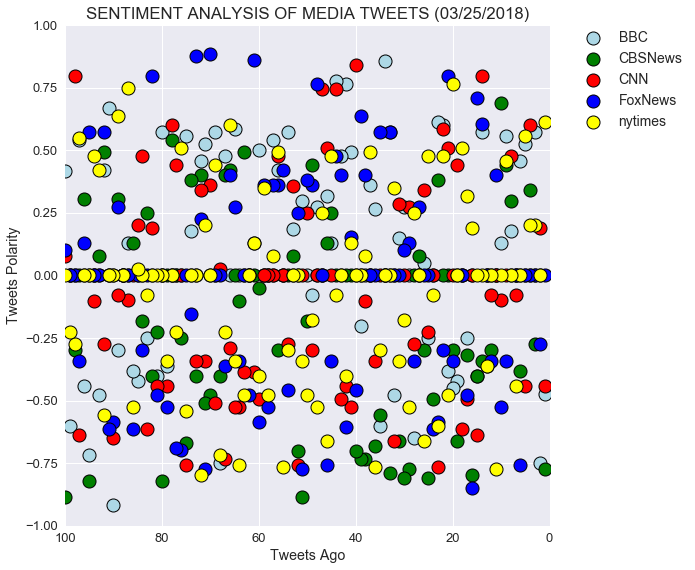

In [355]:
# Create legend for colors
colors = ['lightblue', 'green', 'red', 'blue', 'yellow']

# Use seaborn to make the scatter plot
ax = sns.lmplot(x='Tweet No.', y='Compound Score', data=news_df, fit_reg=False, 
                hue='Source Acc.', legend=False, size=8, 
                scatter_kws={"s":170,'alpha':1, 'edgecolors':'black', 'linewidths':1},
                palette=colors)

# Make the grid, set x-limit and y-limit
plt.grid()
plt.xlim(100,0)
plt.ylim(-1,1)

# Set scale for all the fonts of the plot
sns.set(font_scale=1.4)

# Make x-axis, y-axis & title labels
plt.title("SENTIMENT ANALYSIS OF MEDIA TWEETS (03/25/2018)")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweets Polarity")

# Set the plot baclground color
sns.set_style("dark")

# Format the legend and plot
plt.legend(loc='upper right', title='City Types')
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### Create a Bar graph showing Average Compound Score for all News channels

In [231]:
news_df_grouped = news_df.groupby('Source Acc.')

In [232]:
avg_comp_score = pd.DataFrame(news_df_grouped['Compound Score'].mean())
avg_comp_score = avg_comp_score.rename(columns = {'Compound Score':'Avg Compound Score'})
avg_comp_score.round(2)

,Avg Compound Score
Source Acc.,
BBC,0.06
CBSNews,-0.14
CNN,-0.04
FoxNews,-0.02
nytimes,-0.04


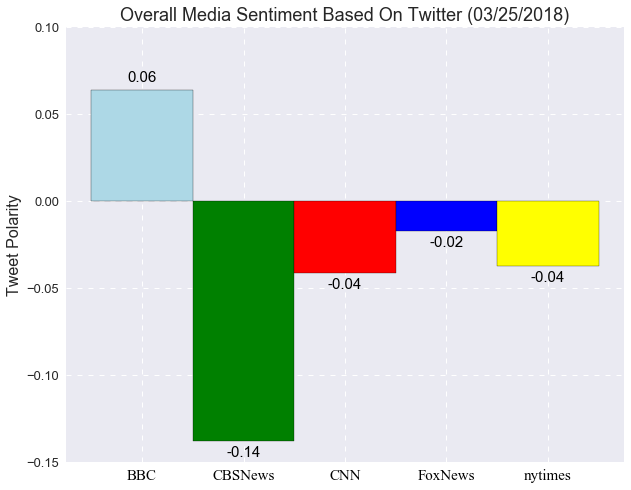

In [350]:
# make the Bar Chart
fig, ax = plt.subplots(figsize=(10,8))

bars = ax.bar(avg_comp_score.index, avg_comp_score['Avg Compound Score'], color=colors, alpha=1, width=1,
       edgecolor='black')

# Format Grid
plt.grid(linestyle = '--', dashes=(5,6))

# Set the axis limits
plt.ylim(-.15,.1)

# Make x-axis, y-axis & title labels
ax.set_title("Overall Media Sentiment Based On Twitter (03/25/2018)", fontsize=18)
#ax.set_xlabel("News Channels", fontsize=15)
ax.set_ylabel("Tweet Polarity", fontsize=16)

# Retrieve an element of a plot and set properties
for tick in ax.xaxis.get_ticklabels():
    tick.set_fontsize('medium')
    tick.set_fontname('Times New Roman')
    tick.set_color('black')
    tick.set_weight('bold')

# Set bar color per performance
# bars = bars[0].set_color('g')

# Print tumor percent change values on individual Bars
rects = ax.patches

# For each bar: Place a label
for rect in rects:
    # Get X and Y placement of label from rect
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    va = 'bottom'

    # If value of bar is negative: Place label below bar
    if y_value < 0:
        y_value = rect.get_height()
        space *= -1
        # Vertically align label at top
        va = 'top'

    # Use Y value as label and format number with one decimal place
    label = "{:.2f}".format(y_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(0, space),          # Vertically shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        ha='center',                # Horizontally center label
        va=va,
        color='black',
        fontsize=15) 

plt.show()